# Bike Analysis

### 1.Business Understanding

The Capital Bike Sharing dataset contains information about a bike sharing program in Washington DC that could be used to forecast demand for bike rentals. Bike sharing programs have gained popularity due to increased interest in environmental issues and health. The data generated by these programs can be used for research.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

### 2. Data Understanding

In [2]:
# Reading the data into dataframe 
main_df = pd.read_csv("bike_hours.csv")
main_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
main_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5896,5897,2011-09-08,3,0,9,5,0,4,1,3,0.62,0.5455,0.94,0.0896,1,13,14
13345,13346,2012-07-15,3,1,7,6,0,0,0,1,0.68,0.6364,0.83,0.1343,6,9,15
6495,6496,2011-10-03,4,0,10,5,0,1,1,2,0.36,0.3636,0.76,0.1045,4,17,21
1457,1458,2011-03-06,1,0,3,0,0,0,0,2,0.42,0.4242,0.77,0.3582,11,41,52
6405,6406,2011-09-29,4,0,9,11,0,4,1,1,0.62,0.6061,0.61,0.1940,36,122,158


In [4]:
main_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
# checking the information of the columns/features
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# print("Using Column Data Type::\n" )
# print(main_df.select_dtypes(include=['float64']).columns)

In [7]:
main_df.shape

(17379, 17)

The Dataset has 17379 rows and 17 columns.

In [8]:
# statistical summary of the features
main_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 3. Data Wrangling & Exploration

#### 3.1 Standardize Attribute Names

In [9]:
# renaming the columns to make them more understandable and pythonic
main_df.rename(columns={'instant':'rec_id',
'dteday':'datetime',
'holiday':'is_holiday',
'workingday':'is_workingday',
'weathersit':'weather_condition',
'hum':'humidity',
'mnth':'month',
'cnt':'total_count',
'hr':'hour',
'yr':'year'},inplace=True)

In [10]:
# checking change
main_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [11]:
#import pandas_profiling 
#pandas_profiling.ProfileReport(main_df)

####  3.2 Checking for Completeness

In [12]:
# 1. Checking the missing values
def missing_value_checker(df):
    missing_values=df.isnull().sum()
    percent_missing = df.isnull().sum()/main_df.shape[0]*100

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing
    }
    frame=pd.DataFrame(value)

    if frame.size > 0:
        print("No Missing Values")
    else:
        print("Missing columns are::",frame.columns[frame.isnull().any()].tolist())

    return frame

missing_value_checker(main_df)

No Missing Values


,missing_values,percent_missing %
rec_id,0,0.0
datetime,0,0.0
season,0,0.0
year,0,0.0
month,0,0.0
hour,0,0.0
is_holiday,0,0.0
weekday,0,0.0
is_workingday,0,0.0
weather_condition,0,0.0


The dataset is complete as it contains no missing values

#### 3.3 Checking for consistency

In [13]:
# 2.check if there any duplicated data in the dataframe
def duplicate_checker(df):
    duplicate = df[df.duplicated()]
    if duplicate.empty== True:
        print("No duplicated data")
    else:
        print(f"Duplicate Rows except first occurrence based on all columns are :",duplicate)
    

duplicate_checker(main_df)

No duplicated data


The dataset is consistent as it contains no duplicated values

#### 3.4 Checking for Uniformity

In [14]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

### Typecast Attributes

In [15]:
# Date time conversion to timestamp
main_df['datetime'] = pd.to_datetime(main_df.datetime)

In [16]:
# Converting the variables to categorical
def categorical_typecaster(df,columns):
    for column in columns:
        df[column] = df[column].astype('category')
    return df.info()

categorical_typecaster(main_df,['season','is_holiday','weekday','weather_condition','is_workingday','month','year','hour'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

#### 3.5 Checking for Validity

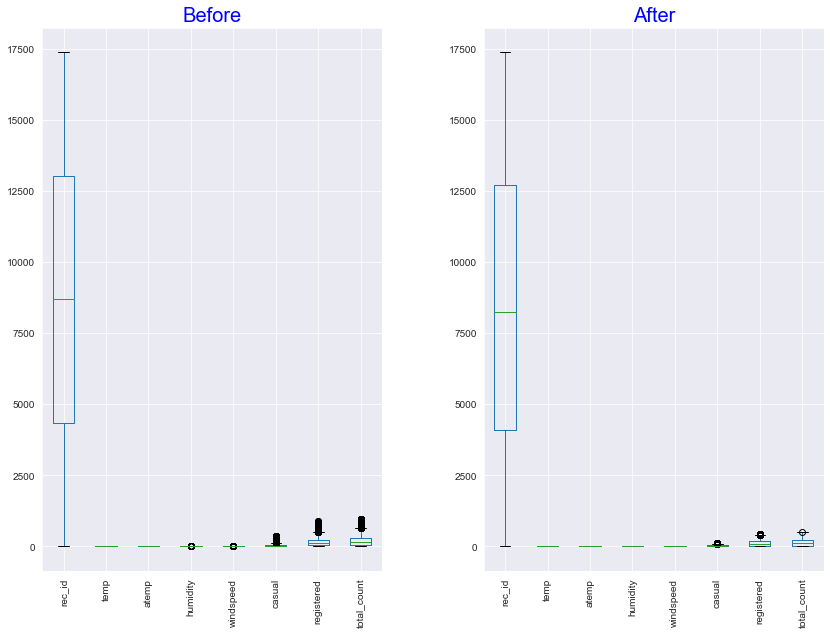

In [17]:
# 4.Fuction to check and handle outliers
def check_and_handle_outliers(df):
    df1 = df.copy()
    # check the outliers
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

    # visualize before and after dealing with outliers
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    df1.boxplot(ax=ax[0])
    ax[0].set_title('Before',fontdict={'fontsize': 20, 'color': 'blue',})
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)

    df.boxplot(ax=ax[1])
    ax[1].set_title('After',fontdict={'fontsize': 20,'color': 'blue'})
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
    plt.subplots_adjust(wspace=0.3)
    plt.show()

    return df

main_df = check_and_handle_outliers(main_df)

The outliers have been removed from the dataset as shown in the above figure.

<AxesSubplot:xlabel='year', ylabel='total_count'>

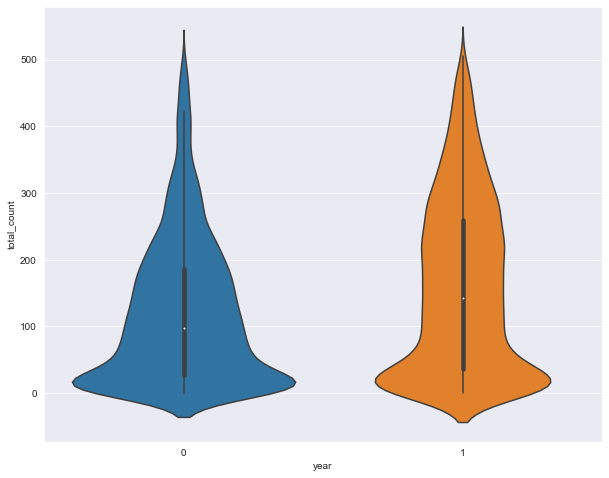

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=main_df[['year','total_count']],x="year",y="total_count",ax=ax)

Interpretation of the violin  plot 
it is more advantageaous to the boxplot due to the ability to visualize probabilty density of data especially for multimodal data


### Explanatory Data Analysis

####  1. Univariate Analysis

In [19]:
visual_df = main_df.copy()

In [20]:

# mapping the holiday
visual_df['is_holiday'] = visual_df['is_holiday'].map({1:True,0:False})

# mapping the working day
visual_df['is_workingday'] = visual_df['is_workingday'].map({1:True,0:False})

# mapping the season
visual_df['season'] = visual_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

# mapping the weather condition
visual_df['weather_condition'] = visual_df['weather_condition'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

# mapping the month
visual_df['month'] = visual_df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# mapping the hour
visual_df['hour'] = visual_df['hour'].map({0:'00:00',1:'01:00',2:'02:00',3:'03:00',4:'04:00',5:'05:00',6:'06:00',7:'07:00',8:'08:00',9:'09:00',10:'10:00',11:'11:00',12:'12:00',13:'13:00',14:'14:00',15:'15:00',16:'16:00',17:'17:00',18:'18:00',19:'19:00',20:'20:00',21:'21:00',22:'22:00',23:'23:00'})

# mapping the weekday
visual_df['weekday'] = visual_df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# mapping the year
visual_df['year'] = visual_df['year'].map({0:'2011',1:'2012'})

# checking the change
visual_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,spring,2011,Jan,00:00,False,Sat,False,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,Jan,01:00,False,Sat,False,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,Jan,02:00,False,Sat,False,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,Jan,03:00,False,Sat,False,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,Jan,04:00,False,Sat,False,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
visual_df.is_holiday.value_counts()

False    14518
True       415
Name: is_holiday, dtype: int64

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

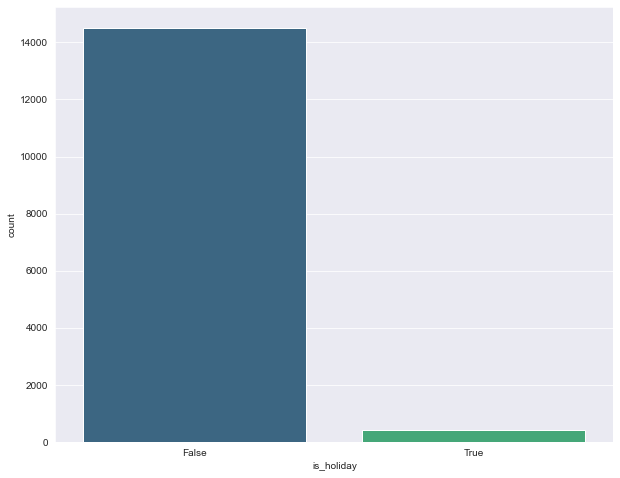

In [22]:
fig ,ax = plt.subplots(figsize=(10,8))
sns.countplot(data=visual_df, x='is_holiday',palette='viridis')

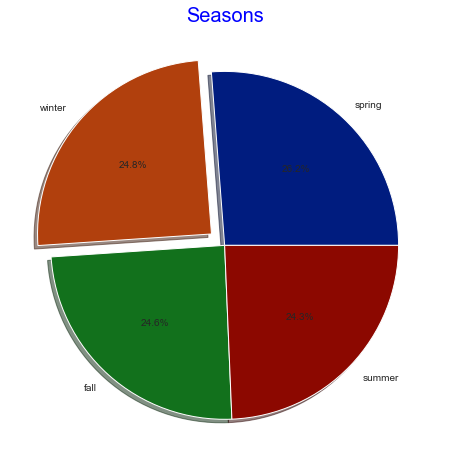

In [23]:
# checking for distribution in seasons pie chart
fig, ax = plt.subplots(figsize=(10, 8))
visual_df.season.value_counts().plot.pie(autopct='%1.1f%%',ax=ax, explode=[0,0.1,0,0], shadow=True, colors=sns.color_palette('dark'))
ax.set_title('Seasons',fontdict={'fontsize': 20, 'color': 'blue',})
ax.set_ylabel('')
plt.show()


#### 2. Bivariate Analysis

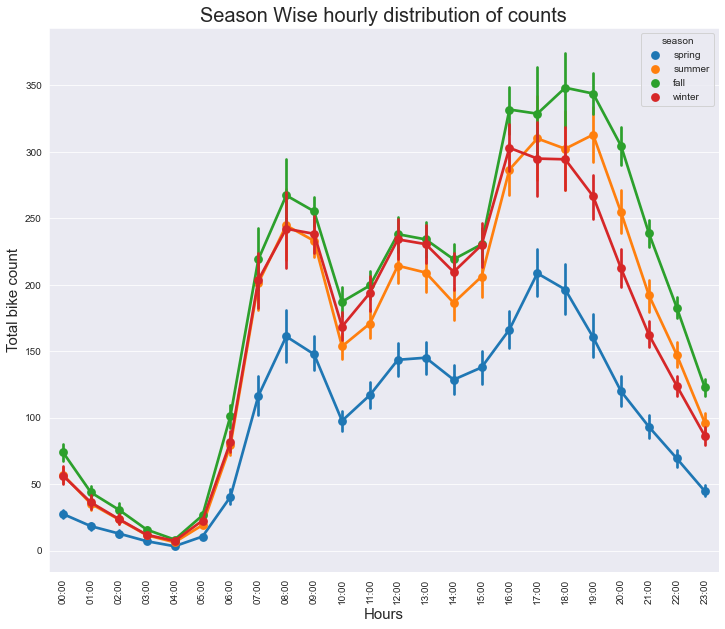

In [24]:
fig , ax = plt.subplots(figsize=(12,10))
sns.pointplot(data=visual_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
plt.title('Season Wise hourly distribution of counts',fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Total bike count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

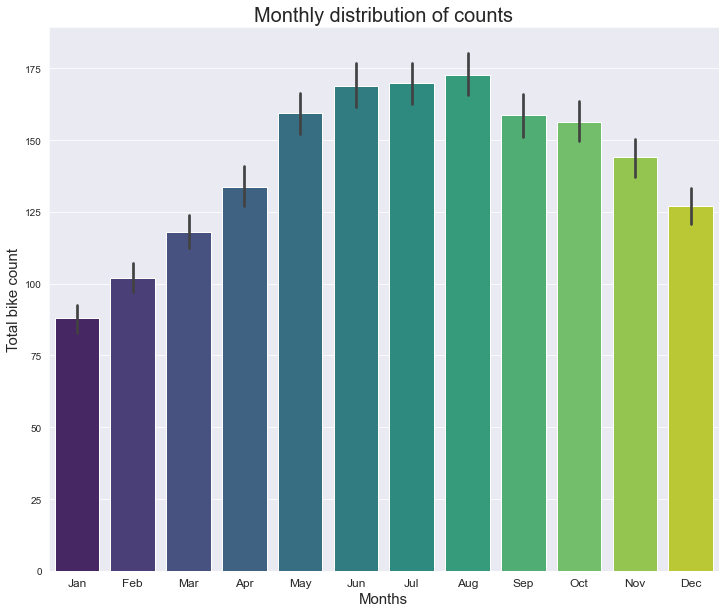

In [25]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=visual_df[['month','total_count','season']], x="month",y="total_count",ax=ax,palette='viridis')
plt.title('Monthly distribution of counts',fontsize=20)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Total bike count",fontsize=15)
plt.xticks(fontsize=12)
plt.show()

The month with the highest number of bike rentals is August

#### 3.Multivariate Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'temp'),
  Text(0, 1.5, 'atemp'),
  Text(0, 2.5, 'windspeed'),
  Text(0, 3.5, 'humidity'),
  Text(0, 4.5, 'casual'),
  Text(0, 5.5, 'registered'),
  Text(0, 6.5, 'total_count')])

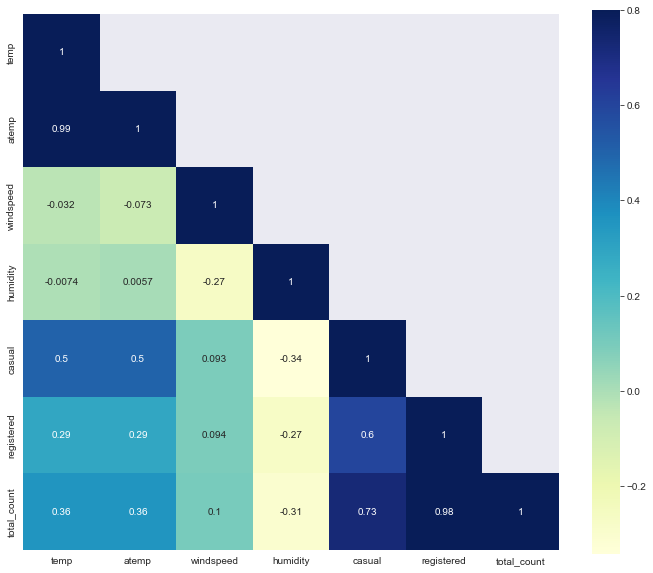

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
corrMatt = main_df[["temp","atemp","windspeed","humidity","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True,ax=ax, cmap="YlGnBu")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### 4. Data Preparation & Modeling

##### Dealing with the categorical variables

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14933 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             14933 non-null  int64         
 1   datetime           14933 non-null  datetime64[ns]
 2   season             14933 non-null  category      
 3   year               14933 non-null  category      
 4   month              14933 non-null  category      
 5   hour               14933 non-null  category      
 6   is_holiday         14933 non-null  category      
 7   weekday            14933 non-null  category      
 8   is_workingday      14933 non-null  category      
 9   weather_condition  14933 non-null  category      
 10  temp               14933 non-null  float64       
 11  atemp              14933 non-null  float64       
 12  humidity           14933 non-null  float64       
 13  windspeed          14933 non-null  float64       
 14  casual

In [29]:
main_df.weekday.value_counts()

5    2230
3    2209
4    2195
1    2193
2    2182
0    1994
6    1930
Name: weekday, dtype: int64

In [30]:
# dealing with categorical variables
def label_encoding(df):
    le = LabelEncoder()
    cols = ['is_holiday','is_workingday','weather_condition']
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return df

main_df = label_encoding(main_df)

In [31]:
# dealing with categorical columns where order matters
def encoding_ordered(df):
    ohe = OneHotEncoder()
    cols = ['season','weekday','month','year','hour']
    ohe.fit(df[cols])
    df = pd.concat([df, pd.DataFrame(ohe.transform(df[cols]).toarray(), columns=ohe.get_feature_names_out(cols))], axis=1)
    df = df.drop(cols, axis=1)
    return df

main_df = encoding_ordered(main_df)

This code first fits the OneHotEncoder on the selected columns of the dataframe, and then applies the transform method to the same columns. The resulting array is then converted to a DataFrame and concatenated to the original dataframe. Finally, the original columns are removed.

In [32]:
main_df.sample(5)

,rec_id,datetime,is_holiday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
12432,12433.0,2012-06-07,0.0,1.0,0.0,0.48,0.4697,0.82,0.0896,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15598,15599.0,2012-10-17,0.0,1.0,0.0,0.36,0.3788,0.87,0.0000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15052,15053.0,2012-09-24,0.0,1.0,0.0,0.52,0.5000,0.52,0.1940,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5967,5968.0,2011-09-11,0.0,0.0,0.0,0.60,0.5606,0.83,0.1343,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16531,16532.0,2012-11-26,0.0,1.0,0.0,0.42,0.4242,0.35,0.1045,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
main_df.isnull().sum()

rec_id               2046
datetime             2046
is_holiday           2046
is_workingday        2046
weather_condition    2046
                     ... 
hour_19              2046
hour_20              2046
hour_21              2046
hour_22              2046
hour_23              2046
Length: 61, dtype: int64

In [34]:
def drop_missing_data(df):
    df = df.dropna()
    return df

main_df = drop_missing_data(main_df)

In [35]:
main_df.sample(5)

,rec_id,datetime,is_holiday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
9431,9432.0,2012-02-02,0.0,1.0,0.0,0.34,0.3030,0.46,0.4179,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9412,9413.0,2012-02-02,0.0,1.0,1.0,0.42,0.4242,0.67,0.1343,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14055,14056.0,2012-08-13,0.0,1.0,0.0,0.74,0.6818,0.62,0.2239,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,599.0,2011-01-28,0.0,1.0,1.0,0.20,0.2273,0.75,0.1045,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13848,13849.0,2012-08-05,0.0,0.0,0.0,0.72,0.6970,0.74,0.2537,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Feature scaling

In [36]:
main_df.dtypes.to_frame().T

,rec_id,datetime,is_holiday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,float64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [37]:
main_df.head()

,rec_id,datetime,is_holiday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1.0,2011-01-01,0.0,0.0,0.0,0.24,0.2879,0.81,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2011-01-01,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2011-01-01,0.0,0.0,0.0,0.22,0.2727,0.80,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2011-01-01,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2011-01-01,0.0,0.0,0.0,0.24,0.2879,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# feature scaling
from sklearn.preprocessing import StandardScaler

def feature_scaling(df, columns):
    for col in columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[[col]])
    return df

main_df = feature_scaling(main_df, main_df.columns)
main_df.sample(5)

,rec_id,datetime,is_holiday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
63,-1.673625,2011-01-03,-0.161859,0.632095,-0.671544,-1.292521,-1.226481,-1.694527,-0.686787,-0.545118,...,-0.194983,-0.195198,-0.196266,-0.147938,6.187862,-0.198177,-0.219236,-0.221751,-0.217872,-0.223096
4390,-0.657226,2011-07-06,-0.161859,0.632095,-0.671544,1.164358,1.288644,0.497110,0.645336,1.206499,...,-0.194983,-0.195198,-0.196266,-0.147938,-0.161607,-0.198177,-0.219236,-0.221751,-0.217872,-0.223096
11129,0.925744,2012-04-13,-0.161859,0.632095,-0.671544,-0.268821,-0.185858,-0.129072,-0.686787,0.406848,...,-0.194983,-0.195198,-0.196266,-0.147938,-0.161607,-0.198177,-0.219236,-0.221751,-0.217872,-0.223096
12672,1.288190,2012-06-17,-0.161859,-1.582041,-0.671544,0.243028,0.248021,0.184019,-0.420720,-0.735511,...,-0.194983,-0.195198,-0.196266,-0.147938,-0.161607,-0.198177,-0.219236,-0.221751,-0.217872,-0.223096
3129,-0.953431,2011-05-15,-0.161859,-1.582041,0.866158,0.140658,0.161017,1.853838,-0.420720,-0.735511,...,-0.194983,-0.195198,-0.196266,-0.147938,-0.161607,-0.198177,4.561295,-0.221751,-0.217872,-0.223096


In [39]:
main_df.drop({'datetime','rec_id'}, axis=1, inplace=True)

In [42]:
# feature selection
from sklearn.feature_selection import SelectKBest

def feature_selection(df, target, k):
    X = df.drop(target, axis=1)
    y = df[target]
    selector = SelectKBest(k=k)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

features = feature_selection(main_df, 'total_count', 12)
features

Index(['is_workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'season_1', 'season_3', 'season_4', 'year_0', 'year_1'],
      dtype='object')

In [43]:
# splitting the data to train and test data
from sklearn.model_selection import train_test_split 

X = main_df.drop('total_count', axis=1)
y = main_df['total_count']

X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

### Model Building & Evaluation

#### LinearRegression

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression

def Modelling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def Evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

y_pred  = Modelling(LinearRegression(), X_train, y_train, X_test, y_test)

In [45]:
# Evaluation of the base linear regression model
Evaluation(y_test, y_pred)

Mean Squared Error:  4.267416462105121e-30
R2 Score:  1.0


#### Decision tree

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

y_pred1  = Modelling(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
y_pred1

array([ 0.26009685, -0.94947865, -0.93267899, ...,  1.2596766 ,
        2.87244393, -1.01667729])

In [47]:
# Evaluation of the decision tree model
Evaluation(y_test, y_pred1)

Mean Squared Error:  0.0006854904385556231
R2 Score:  0.9993227185828129


#### Random Forest

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

y_pred2  = Modelling(RandomForestRegressor(), X_train, y_train, X_test, y_test)
y_pred2

array([ 0.2773165 , -0.95485454, -0.93872686, ...,  1.27908021,
        2.81297313, -1.01734927])

In [49]:
# Evaluation of the Random forest model
Evaluation(y_test, y_pred2)

Mean Squared Error:  0.0001343786661386236
R2 Score:  0.9998672305719772


#### Tuned Random Forest

In [50]:
# tuning Random forest model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]   
}

grid = RandomizedSearchCV(RandomForestRegressor(), params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 15}

In [51]:
# tuned Random forest model
y_pred3  = Modelling(RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_depth= 15), X_train, y_train, X_test, y_test)
y_pred3

array([ 0.27915366, -0.95191438, -0.93822348, ...,  1.28939584,
        2.81982028, -1.0166042 ])

In [52]:
# Evaluation of the tuned Random forest model
Evaluation(y_test, y_pred3)

Mean Squared Error:  0.00013435489241572107
R2 Score:  0.9998672540610004


### Testing